In [2]:
!pip install jupyterthemes

In [3]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [6]:
!jt -t onedork

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stat
import scipy.cluster as cluster
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [3]:
client = pd.read_csv("CLIENT.csv", delimiter="|",parse_dates = ['DATENAISSANCE', 'DATEDEBUTADHESION', 'DATEREADHESION', 'DATEFINADHESION'])
client.head()

C:\Users\charl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,VIP,CODEINSEE,PAYS
0,155891.0,MADAME,NaN,VLG,2005-05-13,2017-04-04,2018-04-30,0,74224,FR
1,156023.0,MONSIEUR,7/08/1966 0:00:00,VLG,2005-05-14,2014-06-21,2016-06-30,0,74189,FR
2,124203.0,MADAME,NaN,BEA,2005-03-16,2017-12-10,2018-10-31,0,63070,FR
3,156190.0,MADAME,24/07/1976 0:00:00,SUR,2006-08-28,2015-05-24,2016-05-31,0,92026,FR
4,144444.0,MONSIEUR,NaN,LAB,2006-04-29,2016-12-18,2017-12-31,0,31555,FR


In [4]:
client['DATENAISSANCE'] = pd.to_datetime(client['DATENAISSANCE'], errors='coerce')

In [67]:
client.dtypes

IDCLIENT                    float64
CIVILITE                     object
DATENAISSANCE        datetime64[ns]
MAGASIN                      object
DATEDEBUTADHESION    datetime64[ns]
DATEREADHESION       datetime64[ns]
DATEFINADHESION      datetime64[ns]
VIP                           int64
CODEINSEE                    object
PAYS                         object
dtype: object

In [6]:
client.shape

(845876, 10)

In [39]:
client.isna().sum()

IDCLIENT                  0
CIVILITE                  0
DATENAISSANCE        337974
MAGASIN                   0
DATEDEBUTADHESION         0
DATEREADHESION       338060
DATEFINADHESION           0
VIP                       0
CODEINSEE             27421
PAYS                      3
dtype: int64

In [42]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845876 entries, 0 to 845875
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   IDCLIENT           845876 non-null  float64
 1   CIVILITE           845876 non-null  object 
 2   DATENAISSANCE      507902 non-null  object 
 3   MAGASIN            845876 non-null  object 
 4   DATEDEBUTADHESION  845876 non-null  object 
 5   DATEREADHESION     507816 non-null  object 
 6   DATEFINADHESION    845876 non-null  object 
 7   VIP                845876 non-null  int64  
 8   CODEINSEE          818455 non-null  object 
 9   PAYS               845873 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 64.5+ MB


In [7]:
client.CIVILITE.unique()

array(['MADAME', 'MONSIEUR', 'monsieur', 'madame', 'Mme', 'Mr'],
      dtype=object)

### il faut nettoyer : Mr = MONSIEUR etc etc

In [111]:
client["CIVILITE"].replace({"Mr": "MONSIEUR",  "Mme": "MADAME"}, inplace=True)

In [112]:
client["CIVILITE"].replace({"monsieur": "MONSIEUR",  "madame": "MADAME"}, inplace=True)

In [113]:
client.CIVILITE.unique()

array(['MADAME', 'MONSIEUR'], dtype=object)

### Repart h/f

In [114]:
client.CIVILITE.value_counts()

MADAME      457691
MONSIEUR    388185
Name: CIVILITE, dtype: int64

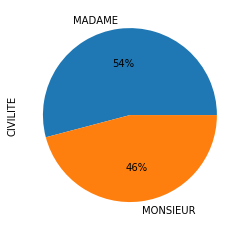

In [122]:
dfl = client.groupby('CIVILITE')['CIVILITE'].count()
dfl.plot(kind='pie', subplots = True, autopct='%1.0f%%');

### Dates de naissances

In [68]:
client.DATENAISSANCE.describe()

C:\Users\charl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  507852
unique                  27819
top       1970-01-10 00:00:00
freq                      680
first     1771-07-12 00:00:00
last      2198-01-17 00:00:00
Name: DATENAISSANCE, dtype: object

In [102]:
client.DATENAISSANCE.isnull().sum()

338024

In [103]:
client.DATENAISSANCE.value_counts()

1970-01-10    680
1973-03-07     53
1967-11-05     52
1973-07-02     51
1973-09-21     51
             ... 
2013-12-22      1
1927-09-12      1
2009-01-03      1
1923-01-05      1
1927-02-09      1
Name: DATENAISSANCE, Length: 27819, dtype: int64

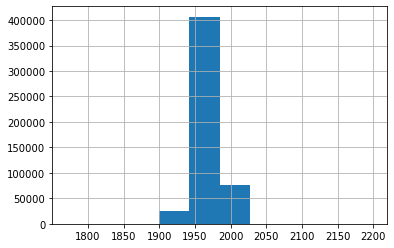

In [70]:
client.DATENAISSANCE.hist()

In [7]:
dfage = client[(client.DATENAISSANCE > "1920") & (client.DATENAISSANCE < "2018") & (client.DATENAISSANCE != "1970-01-10") & (client.DATEFINADHESION < "2020")]

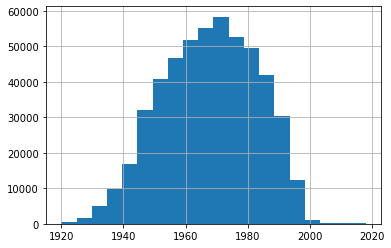

In [7]:
dfage.DATENAISSANCE.hist(bins = 20)

In [14]:
dfage[(dfage.CIVILITE == "MADAME")].DATENAISSANCE.mean()

Timestamp('1967-10-30 10:08:26.202928896')

In [ ]:
sns.displot(dfage, x = 'DATENAISSANCE', binwidth=0.1, height = 4, aspect = 1.5, col = 'CIVILITE', hue = 'CIVILITE')
plt.title('Histogramme : Repartition age client par sexe')
plt.show()

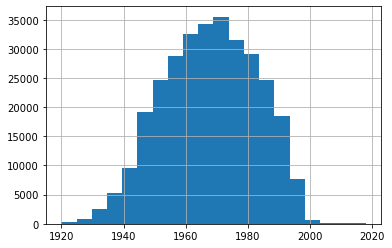

In [13]:
dfage[(dfage.CIVILITE == "MADAME")].DATENAISSANCE.hist(bins = 20)

In [15]:
dfage[(dfage.CIVILITE == "MADAME")].DATENAISSANCE.mean()

Timestamp('1967-10-30 10:08:26.202928896')

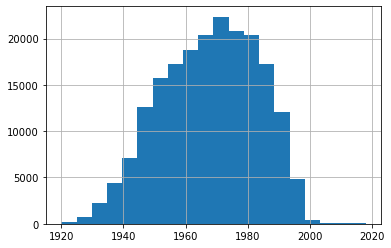

In [9]:
dfage[(dfage.CIVILITE == "MONSIEUR")].DATENAISSANCE.hist(bins = 20)

In [12]:
dfage[(dfage.CIVILITE == "MONSIEUR")].DATENAISSANCE.mean()

Timestamp('1967-11-06 05:37:56.401564520')

In [ ]:
DATEDEBUTADHESION	DATEREADHESION	DATEFINADHESION

In [28]:
client.DATEDEBUTADHESION.describe()

C:\Users\charl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  845876
unique                   6356
top       2001-01-03 00:00:00
freq                    10214
first     1997-01-01 00:00:00
last      2017-12-31 00:00:00
Name: DATEDEBUTADHESION, dtype: object

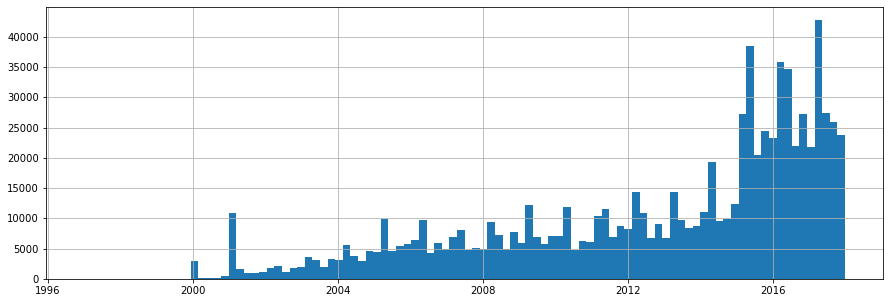

In [119]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()

client.DATEDEBUTADHESION.hist(bins = 100)

In [152]:
client.DATEREADHESION.describe()

C:\Users\charl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  507816
unique                   2860
top       2017-08-04 00:00:00
freq                     2149
first     2003-01-03 00:00:00
last      2018-07-01 00:00:00
Name: DATEREADHESION, dtype: object

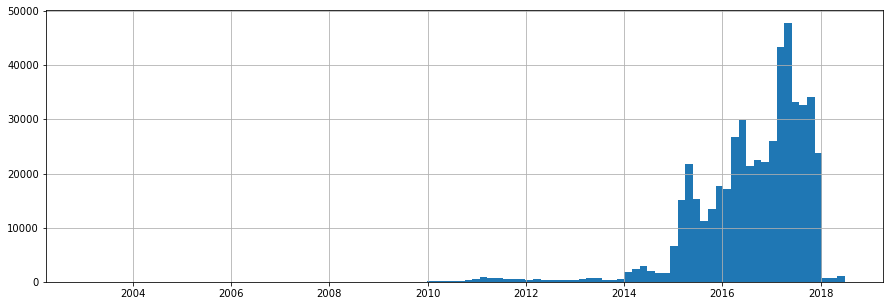

In [120]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()

client.DATEREADHESION.hist(bins=100)

In [121]:
client.DATEFINADHESION.describe()

C:\Users\charl\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  845876
unique                    161
top       2018-05-31 00:00:00
freq                    56297
first     2016-01-21 00:00:00
last      2100-01-31 00:00:00
Name: DATEFINADHESION, dtype: object

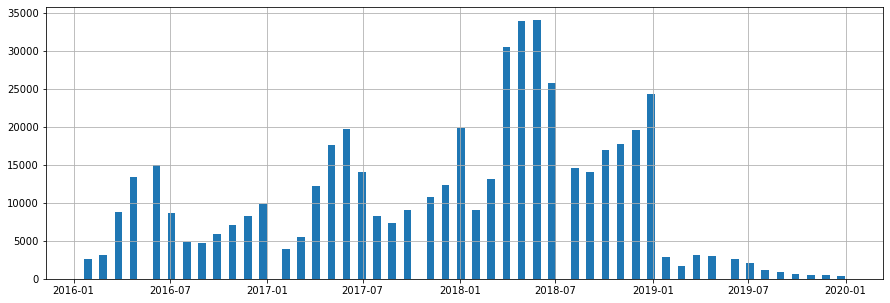

In [123]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()

dfage.DATEFINADHESION.hist(bins=100)

In [16]:
# A calculer : temps d'adhesion'

In [56]:
client["DUREEADHESION"] = (client.DATEFINADHESION - client.DATEDEBUTADHESION).astype('timedelta64[D]')

In [57]:
dfdur = client[(client.DATENAISSANCE > "1920") & (client.DATENAISSANCE < "2018") & (client.DATENAISSANCE != "1970-01-10") & (client.DATEFINADHESION < "2020")]

In [58]:
dfdur.head()

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,VIP,CODEINSEE,PAYS,DUREEADHESION
1,156023.0,MONSIEUR,1966-07-08,VLG,2005-05-14,2014-06-21,2016-06-30,0,74189,FR,4065.0
3,156190.0,MADAME,1976-07-24,SUR,2006-08-28,2015-05-24,2016-05-31,0,92026,FR,3564.0
5,104715.0,MADAME,1963-07-26,BEA,2005-05-02,2011-02-07,2018-07-31,1,63052,FR,4838.0
7,120577.0,MONSIEUR,1946-02-20,VIF,2005-03-28,2015-03-04,2016-04-30,0,38034,FR,4051.0
8,144526.0,MONSIEUR,1978-09-08,SMR,2005-08-13,2016-12-05,2017-05-31,0,13056,FR,4309.0


In [59]:
dfdur["DUREEADHESION"].describe()

count    506736.000000
mean       1699.254132
std        1751.154950
min        -158.000000
25%         377.000000
50%         778.000000
75%        2832.000000
max        8277.000000
Name: DUREEADHESION, dtype: float64

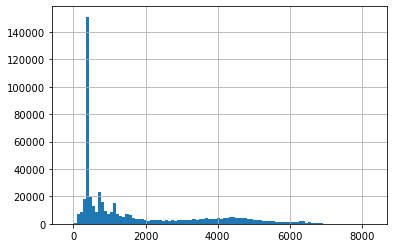

In [71]:
dfdur.DUREEADHESION.hist(bins=100)

In [96]:
gr = dfdur.groupby('DUREEADHESION').agg({'DUREEADHESION':'count'}).sort

In [112]:
dfdur['DUREEADHESION'].value_counts(bins=300).head(10)

(348.1, 376.217]      91968
(376.217, 404.333]    52988
(741.733, 769.85]     10035
(713.617, 741.733]     9575
(460.567, 488.683]     7449
(769.85, 797.967]      7220
(432.45, 460.567]      6807
(319.983, 348.1]       6494
(404.333, 432.45]      6109
(263.75, 291.867]      6041
Name: DUREEADHESION, dtype: int64

In [ ]:
#Identifier le pic

In [61]:
dfdur.shape

(506736, 11)

In [63]:
Test = dfdur[(dfdur.DUREEADHESION < 0)]

In [64]:
Test.shape

(3, 11)

In [65]:
Test

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,VIP,CODEINSEE,PAYS,DUREEADHESION
643563,3116911.0,MADAME,1979-06-14,BAR,2016-11-05,2017-01-17,2016-07-31,0,04019,FR,-97.0
670086,3345202.0,MONSIEUR,1998-12-24,SMR,2017-12-05,NaT,2017-06-30,0,13039,FR,-158.0
698715,3069454.0,MONSIEUR,1995-10-14,EPN,2016-11-04,2016-07-16,2016-05-31,0,88037,FR,-157.0


In [66]:
Test2 = dfdur[(dfdur.DUREEADHESION > 8270)]

In [67]:
Test2.head()

,IDCLIENT,CIVILITE,DATENAISSANCE,MAGASIN,DATEDEBUTADHESION,DATEREADHESION,DATEFINADHESION,VIP,CODEINSEE,PAYS,DUREEADHESION
89000,282416.0,MADAME,1966-09-20,MET,1997-01-01,2017-09-08,2019-08-31,1,74093,FR,8277.0


### Nombre de clients par magasin

In [ ]:
Nombre de magasins par année

In [13]:
client.MAGASIN.unique()

array(['VLG', 'BEA', 'SUR', 'LAB', 'SMR', 'VIF', 'OBE', 'VAR', 'SSM',
       'QUE', 'VIC', 'VIT', 'DUM', 'FRV', 'VIB', 'SJV', 'IAB', 'ECU',
       'BEC', 'CLA', 'STE', 'BLA', 'ALB', 'AVI', 'MAC', 'MOB', 'GAP',
       'MAN', 'SEM', 'VAL', 'MOU', 'MUL', 'POC', 'NEV', 'PEP', 'RAV',
       'SEY', 'MET', 'PEG', 'DIJ', 'SNO', 'RMA', 'GEX', 'STR', 'HEI',
       'PON', 'SGL', 'FEG', 'THO', 'ALM', 'SCH', 'HAG', 'EST', 'CAG',
       'SMA', 'VEN', 'EPN', 'SAL', 'PRI', 'GAI', 'BSN', 'BRE', 'VIV',
       'CLI', 'ORL', 'SLM', 'BAR'], dtype=object)

Text(0.5, 1, 'Nb de clients par Magasin')

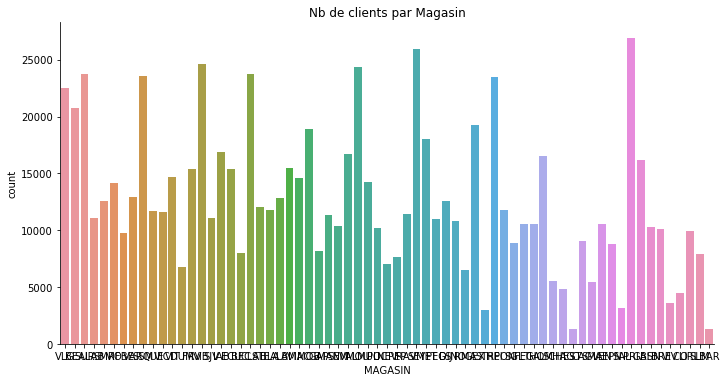

In [148]:
sns.catplot(x = "MAGASIN", kind = "count", data = client, height=5, aspect=2)
plt.title('Nb de clients par Magasin')

## Revoir largeur

Text(0.5, 1, 'Nb de clients par PAYS')

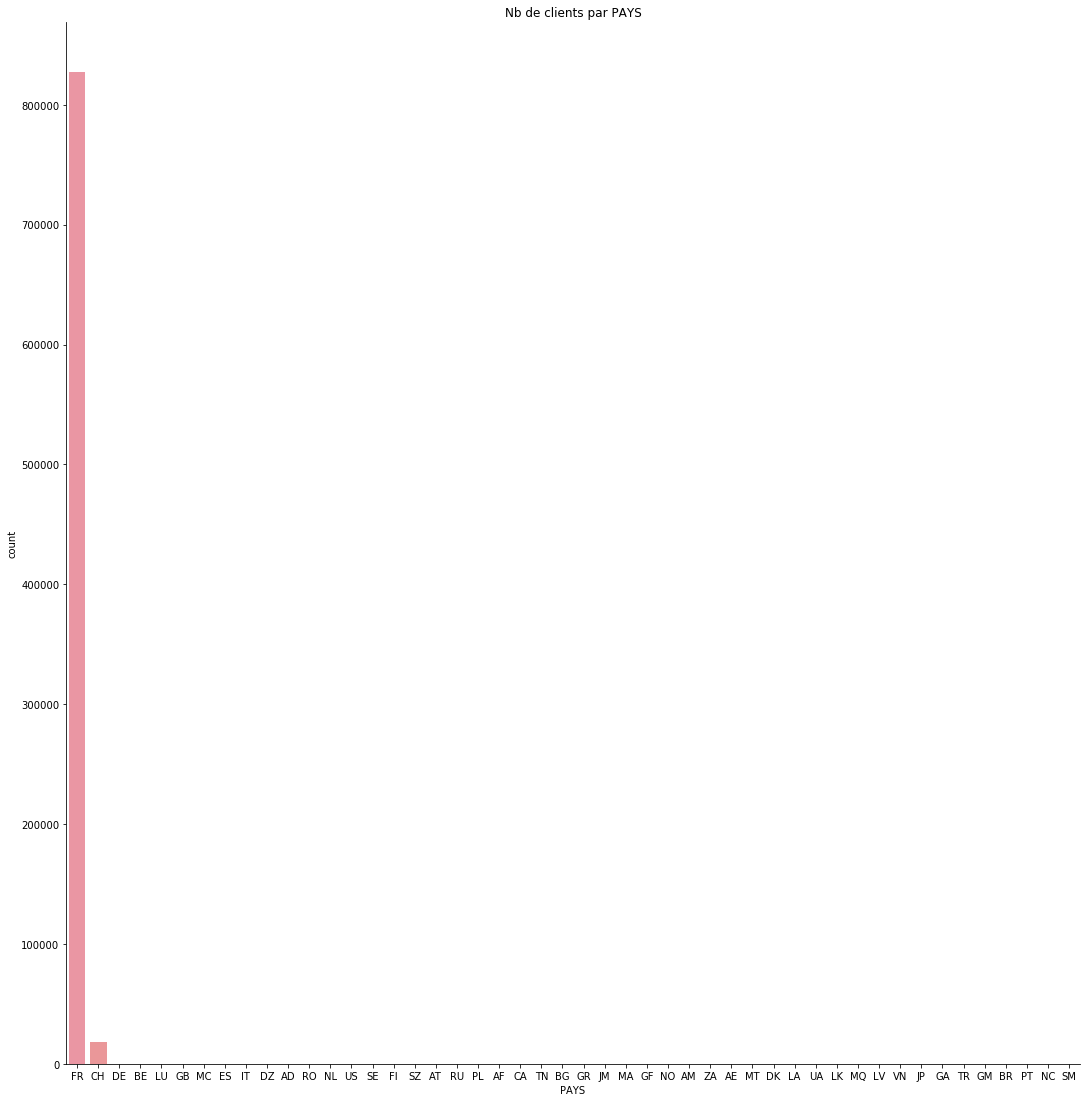

In [143]:
sns.catplot(x = "PAYS", kind = "count", data = client, height = 10, aspect = 1)
plt.title('Nb de clients par PAYS')

In [145]:
client.MAGASIN.value_counts()

PRI    26935
SEY    25967
VIB    24640
MOU    24389
SUR    23784
CLA    23744
SSM    23601
HEI    23500
VLG    22541
BEA    20714
GEX    19278
MOB    18929
MET    17997
IAB    16885
VAL    16685
ALM    16499
GAI    16162
AVI    15435
ECU    15410
FRV    15377
VIT    14673
MAC    14632
MUL    14240
VIF    14180
VAR    12948
ALB    12828
DIJ    12603
SMR    12532
STE    12001
PON    11788
BLA    11748
QUE    11699
VIC    11556
RAV    11396
MAN    11343
SJV    11065
LAB    11058
PEG    11012
SNO    10828
FEG    10561
THO    10549
VEN    10544
SEM    10360
BSN    10302
POC    10182
BRE    10106
ORL     9891
OBE     9709
CAG     9071
SGL     8846
EPN     8800
GAP     8137
BEC     7977
SLM     7894
PEP     7609
NEV     7007
DUM     6761
RMA     6499
SCH     5526
SMA     5413
HAG     4780
CLI     4454
VIV     3632
SAL     3124
STR     2946
BAR     1321
EST     1273
Name: MAGASIN, dtype: int64

In [14]:
client.VIP.unique()

array([0, 1], dtype=int64)

In [19]:
client.VIP.value_counts()

0    735425
1    110451
Name: VIP, dtype: int64

In [22]:
client.VIP.mean()

0.1305758763695861

In [ ]:
Test2 = dfdur[(dfdur.DUREEADHESION > 8270)]

In [140]:
VIP = client[(client.VIP==1)]

In [141]:
VIP.MAGASIN.value_counts()

GEX    4412
VLG    3886
MOB    3660
SSM    3601
MOU    3502
GAI    3434
CLA    3353
HEI    3270
BEA    3190
PRI    2972
SUR    2861
MET    2589
ALM    2564
VIB    2417
SEY    2395
AVI    2367
ECU    2353
FRV    2159
VAR    2090
MUL    1856
SMR    1816
THO    1797
VAL    1770
DIJ    1732
IAB    1661
ALB    1637
VIT    1636
VEN    1582
ORL    1577
MAN    1561
VIF    1541
DUM    1417
RAV    1402
MAC    1376
POC    1353
PON    1342
FEG    1279
STE    1268
GAP    1262
SJV    1244
SNO    1230
BLA    1216
BRE    1205
VIC    1192
PEG    1160
LAB    1094
SEM    1054
OBE    1043
BSN     989
QUE     985
SGL     936
EPN     879
SMA     855
RMA     836
BEC     829
SLM     819
NEV     746
CAG     683
PEP     640
CLI     575
SCH     446
VIV     445
HAG     433
SAL     288
BAR     282
STR     279
EST     128
Name: MAGASIN, dtype: int64

In [15]:
client.PAYS.unique()

array(['FR', 'CH', 'DE', 'BE', 'LU', 'GB', 'MC', 'ES', 'IT', nan, 'DZ',
       'AD', 'RO', 'NL', 'US', 'SE', 'FI', 'SZ', 'AT', 'RU', 'PL', 'AF',
       'CA', 'TN', 'BG', 'GR', 'JM', 'MA', 'GF', 'NO', 'AM', 'ZA', 'AE',
       'MT', 'DK', 'LA', 'UA', 'LK', 'MQ', 'LV', 'VN', 'JP', 'GA', 'TR',
       'GM', 'BR', 'PT', 'NC', 'SM'], dtype=object)

#/!\ Il y a des NaN

In [16]:
client.CODEINSEE.unique()

array(['74224', '74189', '63070', ..., '55507', '02420', '17172'],
      dtype=object)

### Répartition sur les dates à faire

In [22]:
len(client.IDCLIENT.value_counts())

845876

In [23]:
client.duplicated().value_counts()

False    845876
dtype: int64